# ECS7020P - Song Prediction From Humming & Whistling Recordings

# 1 Author

**Student Name:** Oscar Gallegos

**Student ID:** 250851715

# 2 Problem Formulation

## 2.1 Goal

Build a supervised machine learning model that, given a single 10 seconds audio recording of a person humming or whistling, predicts which song (from the dataset) the recording corresponds to.

## 2.2 Formal Statement

Let 𝑋 be the space of audio records of fixed duration (10 s) and Y = {1,…,C} the set of song labels. From a training set $\{(x_i, y_i)\}_{i=1}^N$ drawn IID from an unknown distribution, learn a mapping that generalizes to unseen samples. 

$$
f_{\theta} : X \to Y
$$

This means:

* The model takes an audio clip (x) and outputs a predicted song label (ŷ).

The learning objective is to minimize empirical classification error (or equivalently maximize accuracy) on a validation set. Secondary goals include:

* **Robustness to pitch variation:** A model still predicts the right song even if someone hums 2 semitones higher.
* **Robustness to tempo variation:** If someone hums the melody too fast or too slow, the model still recognizes it.
* **Interpretability of learned features:** Understanding what the model is using to make decisions, i.e. pitch shape, rhythm, MFCCs, mel patterns.

## 2.3 Inputs & Outputs

* **Input:** 10 seconds audio clip (.wav format). Preprocessing will convert this to one or more feature representations.
* **Output:** Discrete song ID (Class label)

## 2.4 Challenges and Relevance of Problem

Identifying a song from a short humming or whistling recording presents several challenges that make the task both difficult and interesting. Because the audio contains only the melodic line without instrumentation, lyrics or harmony, the model must rely almost entirely on pitch contour and temporal structure. This is further complicated by substantial variability between recordings: different users may hum at different tempos, in different keys, with varying degrees of vibrato, background noise, or pitch stability. These factors create high intra-class variability, making it harder for a model to learn consistent patterns.

In addition, the dataset is relatively small (approximately 400–800 samples), which increases the risk of overfitting, especially for deep learning models. This makes the problem a valuable opportunity to explore feature engineering, regularisation, and robust validation strategies. The task also suffers from label ambiguity because short 10-second segment may not capture uniquely identifying melodic segments; many popular songs share similar short melodic fragments.

Together, these challenges highlight why this problem is relevant for machine learning research: it requires designing models that emphasize relative melodic movement rather than absolute pitch, implementing data augmentation to address variability, and evaluating how different feature representations influence classification performance.

## 2.5 Success Criteria and Evaluation

**Primary metric** 

* Accuracy on a validation set: the percentage of validation samples for which the model predicts the correct song.


**Secondary metrics**

* Top-k accuracy: Many songs have similar melodic fragments. The model may confuse them but still get the correct song in its top few predictions. Useful when melodies are short or ambiguous.
  
* Confusion matrix: A table showing which songs are mistaken for which other songs. It helps to understand patterns of mistakes, not just the error rate.

* Per-class precision: to measure how reliable the model’s predictions are when it labels a clip as a specific song.
* Per-class recall: to evaluate how well the model manages to find all examples of each song, especially those that are harder to recognize.
* Per-class macro F1: to obtain a balanced measure that treats every song equally, ensuring that classes with fewer samples are not overshadowed by larger ones.

* Model assessment: Besides numeric scores, we will analyze common confusions and error cases, and inspect which features (e.g., MFCCs vs. pitch contour) contribute most.

## 2.6 Constraints and Assumptions

This project assumes that all audio recordings in the dataset have a fixed duration of 10 seconds; in cases where this is not true, the clips will be padded or truncated to ensure consistent input length. Additionally, we assume that the provided labels accurately reflect the true song identity and treat them as ground truth throughout training and evaluation. Finally, we assume that the training and validation samples are independent and identically distributed (IID), meaning that each sample is drawn independently from the same underlying distribution. This assumption allows the validation performance to serve as an unbiased estimate of generalization, although in practice small datasets and possible similarities between recordings may limit this ideal.


# 3 Methodology

This project approaches the task of predicting the song identity from a 10 second hum or whistle by designing a supervised multi-class classification pipeline. The methodology consists of:

1. Defining training task
2. Defining validation task
3. Selecting appropriate performance metrics
4. Specifying auxiliary tasks that support model development such as feature extraction and exploratory data analysis.


## 3.1 Training Task

The training task is to learn a classifier function $f_{\theta}$ parameterized by ${\theta}$ (model parameters), which maps audio recordings $x \in X$ to song labels $y \in Y = \{1, \ldots, C\}$. The classifier is trained on a dataset of labelled audio samples, where each instance consists of a 10 second waveform and its corresponding song identifier. 

The parameters ${\theta}$ are optimized to minimize empirical classification loss. For most models, this corresponds to the cross-entropy loss:

$$
L(\theta) = -\frac{1}{N} \sum_{i=1}^{N} \log p_{\theta}(y_i \mid x_i)
$$

Preprocessing and feature extraction (e.g., log-mel spectrograms or MFCC coefficients) are treated as an integral part of the training task to ensure that the classifier receives consistent and informative representations.


## 3.2 Validation Task

To assess generalization, the dataset is partitioned into independent training and validation datasets. The validation task evaluates the trained classifier on unseen audio recordings, providing an unbiased estimate of performance. All hyperparameter choices (e.g., feature configuration, model capacity, learning rate, regularization) will be selected based on validation results. The validation set is strictly held out and never used during training.

We ensure that the data split mimics the IID assumption by randomly assigning samples to each set, while noting any potential limitations such as class imbalance or similarity between samples. The validation task therefore supports model selection, early stopping, and error analysis.

## 3.3 Performance Metrics

The primary metric used to evaluate model performance is classification accuracy, defined as the proportion of validation samples whose predicted label matches the ground truth:

$$
\text{Accuracy} = \frac{1}{M} \sum_{j=1}^{M} \mathbf{1}\{ f_\theta(x_j) = y_j \}
$$

where:

* M: Total number of samples in the validation set
* $x_j$: The input of the 𝑗-th example.
* $y_j$: The true label (correct song ID) for sample 𝑗.
* $f_{\theta}(\cdot)$: The trained classifier with parameters θ.

However, accuracy alone may overlook class imbalance or patterns of misclassification. Thus, we additionally consider:

* Confusion matrix, to visualize which songs the model tends to confuse.
* Per-class precision, recall, and F1 score, to understand performance across all labels.
* Top-k accuracy, useful when melodic similarity leads multiple songs to share similar contours.

These metrics support a deeper analysis of model behaviour beyond a single scalar score.


## 3.4 Auxiliary Tasks

Several auxiliary tasks are included to improve the overall robustness of the pipeline:

1. Exploratory data analysis: inspecting waveform statistics, label distribution, and audio examples.
2. Feature engineering: comparing multiple representations (e.g., MFCCs, log-mel spectrograms) to evaluate which contain the most informative melodic structure.
3. Data preprocessing: normalizing audio amplitudes, resampling to a consistent sample rate, and padding/truncating to fixed duration.
4. Data augmentation: introducing pitch shifts, time-stretching, or noise injection to simulate variability in human humming.

These tasks provide insights and help mitigate overfitting given the limited dataset size.

# 4 Implemented ML Prediction Pipelines

This project explores a multi-stage machine learning pipeline designed to predict the identity of a song from a 10-second hum or whistle. The three pipelines implemented follow a structured flow consisting of two stages:

1. Transformation stage that converts raw waveforms into suitable features
2. Model stage that performs multi-class classification
   
* Each stage transforms the intermediate data into a new representation, progressively moving from raw audio to song predictions. The pipeline is modular, enabling each component to be analysed and evaluated independently, while also allowing alternative approaches to be compared.

The general structure for all pipelines is:

Raw Audio Waveform → Preprocessing → Feature Extraction → ML Model → Predicted Song Label

* For each pipeline, the input is the raw waveform sampled from the dataset, and the output is a class label corresponding to one of the possible songs. Intermediate data structures include processed waveforms (float arrays), time–frequency features (MFCC matrices or log-mel spectrograms), and probability vectors output by the classifier.

* Three different pipelines are created by selecting different feature representations and models. All pipelines share the same structure but differ in their specific components.

## 4.1 Transformation Stage

The transformation stage converts the raw audio waveform into a numerical feature representation suitable for machine learning models.

* **Input:** One-dimensional audio signal (time-domain waveform)
* **Output:** Two-dimensional or one-dimensional feature tensor, depending on the chosen representation.

An ensemble stage was not implemented in this study primarily due to the relatively small dataset size. Ensemble methods typically require multiple well-trained, diverse models to achieve performance gains, and with limited training samples per song, individual models risk overfitting. Adding an ensemble under these conditions would likely amplify overfitting rather than improve generalization. Therefore, we focused on evaluating and comparing single-model performance to obtain clearer insights into how each modeling approach handles the hummed and whistled melody classification task.

The entire transformation stage flow consists of the following:

Raw waveform → preprocessing → feature extraction → feature tensor

Preprocessing, which is performed prior to feature extraction to ensure consistency across all samples, consists of: 

* Resampling: Converts all audio clips to a common sampling rate, ensuring that frequency-related features are comparable across samples.
* Amplitude Normalization: Scales the signal to a consistent loudness level so that models focus on pitch and timbre rather than volume differences.
* Trimming/padding to a fixed length (10 seconds): Trimming and padding adjust every audio clip to the same duration, allowing all feature tensors to have uniform shapes required by machine learning models

Two main feature extraction approaches are explored:

1. MFCCs (Mel-Frequency Cepstral Coefficients): MFCCs capture the coarse spectral envelope of the audio and are widely used in speech and humming recognition. They produce a 2D matrix of size (number frames × number coefficients).
For classical machine learning models (Logistic Regression and Random Forest), this matrix is flattened into a 1D feature vector, as these models require fixed-length vectors as input.

2. Log-Mel Spectrograms: Log-mel spectrograms retain richer time–frequency detail and are more suitable for modelling melodic structure. They produce a dense 2D representation, similar to an image. This representation is kept in 2D form for the Convolutional Neural Network (CNN), since CNNs naturally operate on image-like inputs.

The reason for these transformations is because:

* Humming contains pitch contours and harmonic structures that are not sufficiently captured by raw waveforms. This is well suited for Log-mel spectrograms, since they preserve harmonic structure, timbre, and pitch contours very well.
* Most successful audio classification models rely on time–frequency representations that resemble images, making them suitable for convolutional neural networks. Log-mel spectrograms give those representations.
* MFCCs provide a compact representation that can be flattened into a 1-dimensional feature vector, making them computationally efficient and well-suited for algorithms such as logistic regression, random forests, and SVMs that require fixed-length inputs.”

In detail, the three pipelines flow consists of:

1. **Logistic Regression Model:** Raw waveform → preprocessing → MFCCs → flattened 1D feature vector
2. **Random Forest Model:** Raw waveform → preprocessing → MFCCs → flattened 1D feature vector
3. **Convolutional Neural Network Model:** Raw waveform → preprocessing → Log-Mel Spectrograms → 2D feature matrix

## 4.2 Model Stage

Several machine learning models are explored in order to compare their strengths and weaknesses when applied to hum-based song classification. 

* **Input:** A feature tensor (flattened MFCC vector or 2D log-mel spectrogram)
* **Output:** A probability vector across the set of possible song labels.
* **Intermediate data:** Model-specific parameters and internal activations (e.g., tree splits, linear weights, convolutional feature maps)

Three different types of classifiers are implemented:

1. **Logistic Regression:** A simple linear classifier used as a baseline. Although limited in capacity, it serves as a sanity check by establishing whether the extracted features contain enough discriminative information for classification. 

    * **Input:** 1D vector of length 𝐹 (flattened MFCCs).
    * **Output:** Probability vector over song labels.
    * **Operation:** It applies a linear transformation followed by softmax.
    * **Intermediate Data:** linear logits 𝑊𝑥+𝑏 → softmax → **probability vector**

2. **Random Forest Classifier:** A non-linear ensemble of decision trees. Random forests are robust to noisy feature vectors, require minimal tuning, and provide a comparison point against linear baselines.

    * **Input:** 1D vector (same MFCC flattened features as logistic regression)
    * **Output:** Probability vector over classes.
    * **Operation:** Each tree outputs a class vote; votes are averaged.
    * **Intermediate Data:** tree decisions + aggregated votes → class probabilities → **probability vector**
          
3. **Neural Network Model:** CNNs exploit the “image-like” structure of spectrograms and can learn hierarchical patterns such as pitch contours, local harmonics, and timbral cues.

    * **Input:** 2D feature matrix
    * **Output:** Probability vector over song identities
    * **Operation:** convolution → nonlinearity → pooling → dense layers → softmax
    * **Intermediate Data:** convolutional feature maps → pooled maps → dense activations → softmax → **probability vector**

The combination of simple (logistic regression), mid-complexity (random forest), and deep (CNN) models enables comparison under realistic constraints such as:

* Limited dataset size
* Variable humming quality
* Overlapping melodic contours between songs
* Differences in how each model uses time–frequency structure

This allows a complete analysis of how model complexity impacts performance.




# 5 Dataset

This section describes the datasets used to train and evaluate the humming/whistling-based song classification models.  
All datasets are derived from the *MLEnd Hums and Whistles II* waveform collections, which contain raw `.wav` files following the naming convention:

`[Participant ID]_[type of recording]_[interpretation number]_[song]`.wav

As an example: S1_hum_2_Necessities.wav

From this filename we extract:
- **Participant ID** → `S1`  
- **Recording Type** → `hum` (or `whistle`)  
- **Interpretation number** → `2`  
- **Song label** → `Necessities`  

Two raw datasets are provided:

### **5.1 Dataset A — MLEndHWII_sample_400**
- 400 audio samples  
- Contains humming and whistling clips  
- 1.09 GB 
- Used to prototype preprocessing, feature extraction, and modeling  
- Smaller size makes debugging easier  
- Potential limitation: fewer samples per class → risk of overfitting  

### **5.2 Dataset B — MLEndHWII_sample_800**
- 800 audio samples  
- All 400 samples from Dataset A are included  
- 2.19 GB  
- Used to train the final models  
- Increased class coverage and variation  
- Limitation: computational cost increases  

### **Derived Datasets**
From Dataset B (800 samples) we construct:

### **5.3 Training Dataset**
- 80% of samples  
- Stratified by **song** to maintain balanced class proportions  
- Ensures samples are IID by randomizing participants and interpretation number  

### **5.4 Validation Dataset**
- 20% of samples  
- Used only for evaluation  
- No participant overlap constraints (dataset too small to split by identity)  
- Limitation: Some participant leakage is possible

### Summary of Dataset Pipeline
- Raw `.wav` files loaded  
- Metadata parsed from filenames  
- Data indexed into a dataframe  
- Stratified split into Train/Validation  
- These datasets feed into the preprocessing → feature extraction → model pipelines


**Ensuring IID Samples and Dataset Independence**

To approximate IID conditions, all splitting is performed randomly and stratified by the song label, ensuring that each class appears in the same proportions in both training and validation sets. Randomisation across participants, interpretation numbers, and recording types helps prevent systematic patterns that could bias the models.

However, the dataset has structural constraints that limit true independence. Multiple recordings from the same participant, with similar humming/whistling habits, appear in both the training and validation sets. This creates a risk of participant leakage, where the model may partially learn person-specific features (timbre, microphone distance, humming style) instead of purely learning song characteristics. Therefore, although the split is statistically IID, it is not completely identity independent.

This limitation means that validation accuracy may slightly overestimate real-world performance, especially on unseen singers. The analysis later in the report will take this into account when interpreting results.


Firstly, we will import the necessary libraries to begin with our analysis:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import librosa
import numpy as np
import random

# Data Processing
from sklearn.preprocessing import LabelEncoder

# Ml Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The following helper function decodes each filename into structured metadata, allowing us to build a complete labeled dataset directly from the .wav files: 

In [2]:
def parse_filename(filename):
    
    name = os.path.splitext(filename)[0]  # removes .wav
    parts = name.split("_", 3)            # split into 4 parts

    if len(parts) < 4:
        return None  # skips malformed filenames

    participant_id, rec_type, inter, song = parts
    
    return {"participant_id": participant_id,
            "recording_type": rec_type,
            "interpretation_number": inter,
            "song": song,
            "filename": filename 
           }

This block builds the dataset index, which will be the dataframe that will represent the entire dataset. It xtracts metadata from file names, attaches full paths, and builds the complete dataset DataFrame used for training and evaluation:

In [3]:
def build_index(dataset_path):
    records = []

    for f in os.listdir(dataset_path):
        if f.lower().endswith(".wav"):
            parsed = parse_filename(f)
            if parsed:
                parsed["filepath"] = os.path.join(dataset_path, f)
                records.append(parsed)

    return pd.DataFrame(records)

## 5.1 Dataset A — MLEndHWII_sample_400

In [4]:
path_400 = "../data/MLEndHWII_sample_400"
df_400 = build_index(path_400)
print("Dataset A:", len(df_400), "samples")
df_400.head()

Dataset A: 400 samples


,participant_id,recording_type,interpretation_number,song,filename,filepath
0,S100,hum,2,Married,S100_hum_2_Married.wav,../data/MLEndHWII_sample_400\S100_hum_2_Marrie...
1,S100,whistle,2,Happy,S100_whistle_2_Happy.wav,../data/MLEndHWII_sample_400\S100_whistle_2_Ha...
2,S100,whistle,2,RememberMe,S100_whistle_2_RememberMe.wav,../data/MLEndHWII_sample_400\S100_whistle_2_Re...
3,S101,hum,1,Married,S101_hum_1_Married.wav,../data/MLEndHWII_sample_400\S101_hum_1_Marrie...
4,S101,hum,2,Friend,S101_hum_2_Friend.wav,../data/MLEndHWII_sample_400\S101_hum_2_Friend...


## 5.2 Dataset B — MLEndHWII_sample_800

In [5]:
path_800 = "../data/MLEndHWII_sample_800"
df_800 = build_index(path_800)
print("Dataset B:", len(df_800), "samples")
df_800.head()

Dataset B: 800 samples


,participant_id,recording_type,interpretation_number,song,filename,filepath
0,S100,hum,2,Married,S100_hum_2_Married.wav,../data/MLEndHWII_sample_800\S100_hum_2_Marrie...
1,S100,whistle,2,Friend,S100_whistle_2_Friend.wav,../data/MLEndHWII_sample_800\S100_whistle_2_Fr...
2,S100,whistle,2,Happy,S100_whistle_2_Happy.wav,../data/MLEndHWII_sample_800\S100_whistle_2_Ha...
3,S100,whistle,2,RememberMe,S100_whistle_2_RememberMe.wav,../data/MLEndHWII_sample_800\S100_whistle_2_Re...
4,S101,hum,1,Married,S101_hum_1_Married.wav,../data/MLEndHWII_sample_800\S101_hum_1_Marrie...


## 5.3 Training Dataset & 5.4 Validation Dataset

In [6]:
df_train, df_val = train_test_split(df_800, test_size = 0.20, random_state = 42, stratify = df_800["song"])  # preserves class distribution

print("Training Dataset Size:", len(df_train))
print("Validation Dataset Size:", len(df_val))

# Reset indices for convenience
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

Training Dataset Size: 640
Validation Dataset Size: 160


In [7]:
df_train.head() 

,participant_id,recording_type,interpretation_number,song,filename,filepath
0,S108,whistle,1,Feeling,S108_whistle_1_Feeling.wav,../data/MLEndHWII_sample_800\S108_whistle_1_Fe...
1,S48,hum,1,RememberMe,S48_hum_1_RememberMe.wav,../data/MLEndHWII_sample_800\S48_hum_1_Remembe...
2,S69,whistle,2,Necessities,S69_whistle_2_Necessities.wav,../data/MLEndHWII_sample_800\S69_whistle_2_Nec...
3,S35,hum,3,Feeling,S35_hum_3_Feeling.wav,../data/MLEndHWII_sample_800\S35_hum_3_Feeling...
4,S89,whistle,2,Married,S89_whistle_2_Married.wav,../data/MLEndHWII_sample_800\S89_whistle_2_Mar...


In [8]:
df_val.head()

,participant_id,recording_type,interpretation_number,song,filename,filepath
0,S29,hum,3,NewYork,S29_hum_3_NewYork.wav,../data/MLEndHWII_sample_800\S29_hum_3_NewYork...
1,S82,hum,1,Happy,S82_hum_1_Happy.wav,../data/MLEndHWII_sample_800\S82_hum_1_Happy.wav
2,S19,whistle,1,Happy,S19_whistle_1_Happy.wav,../data/MLEndHWII_sample_800\S19_whistle_1_Hap...
3,S173,whistle,1,RememberMe,S173_whistle_1_RememberMe.wav,../data/MLEndHWII_sample_800\S173_whistle_1_Re...
4,S70,hum,3,NewYork,S70_hum_3_NewYork.wav,../data/MLEndHWII_sample_800\S70_hum_3_NewYork...


## Song Distribution Table

In [9]:
datasets = { "Dataset A" : df_400,
             "Dataset B" : df_800,
             "Training Dataset" : df_train,
             "Validation Dataset" : df_val            
            }

song_tables = {}

for name, df in datasets.items():
    song_tables[name] = df["song"].value_counts()

song_dist_table = pd.DataFrame(song_tables).fillna(0).astype(int).T
song_dist_table

song,Feeling,Friend,Happy,Married,Necessities,NewYork,RememberMe,TryEverything
Dataset A,50,50,50,50,50,50,50,50
Dataset B,100,100,100,100,100,100,100,100
Training Dataset,80,80,80,80,80,80,80,80
Validation Dataset,20,20,20,20,20,20,20,20


All four datasets show a perfectly balanced distribution across the eight songs. Each song has the same number of samples within each dataset (50 in Dataset A, 100 in Dataset B, 80 in Training, and 20 in Validation). This uniformity prevents class imbalance and ensures fair model training and evaluation.

## Recording Type Distribution Table

In [10]:
rec_tables = {}

for name, df in datasets.items():
    rec_tables[name] = df["recording_type"].value_counts()

recording_dist_table = pd.DataFrame(rec_tables).fillna(0).astype(int).T
recording_dist_table

recording_type,hum,whistle
Dataset A,201,199
Dataset B,400,400
Training Dataset,317,323
Validation Dataset,83,77


The datasets show an almost balanced split between hum and whistle recordings. While minor differences exist, the overall distribution remains well balanced and should not introduce significant class bias.

## Participant ID Distribution Table

In [11]:
participant_tables = {}

for name, df in datasets.items():
    participant_tables[name] = df["participant_id"].value_counts()

participant_dist_table = pd.DataFrame(participant_tables).fillna(0).astype(int).T
participant_dist_table

participant_id,S1,S10,S100,S101,S102,S103,S104,S105,S106,S107,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
Dataset A,3,1,3,2,0,2,3,2,2,1,...,1,3,1,2,3,1,3,5,2,4
Dataset B,5,5,4,4,4,4,4,4,5,4,...,4,5,4,4,5,4,4,5,4,4
Training Dataset,4,4,3,3,3,4,2,1,4,3,...,3,3,2,3,4,3,4,5,4,3
Validation Dataset,1,1,1,1,1,0,2,3,1,1,...,1,2,2,1,1,1,0,0,0,1


Participant contributions are uneven across the datasets. While Dataset B shows relatively consistent counts per participant, Dataset A and the training/validation splits show noticeable imbalance. This uneven representation may introduce bias during model training, where the model could overfit to participants with more samples and underperform on underrepresented ones. Additionally, participants with zero or very few recordings limit the model’s ability to generalize. These imbalances may need to be addressed through methods such as weighted sampling or data augmentation.

# 6 Experiments and Results

This section presents the experiments conducted using the three proposed models: Logistic Regression, Random Forest, and Convolutional Neural Networks (CNNs). Each model follows a defined preprocessing and feature-extraction pipeline, and results are analysed in the context of the dataset characteristics established in Section 5.

## 6.1 Preprocessing Pipelines (Applied to All Models)

Before feature extraction, all audio files across the four datasets underwent consistent preprocessing:

**1. Amplitude Normalisation:** Ensured that recordings with different loudness levels were mapped to a common amplitude scale. The following function normalises amplitude to range [-1, 1]. It prevents loud recordings from dominating learned features.

In [12]:
def normalize_audio(y):
   
    if np.max(np.abs(y)) == 0:
        return y
    return y / np.max(np.abs(y))

**2. Resampling to a Standard Sample Rate (e.g., 16 kHz):** This eliminated variability due to the original recording devices. This function resamples the waveform to the target sampling rate.

In [13]:
TARGET_SR = 16000 

def resample_audio(y, orig_sr, target_sr = TARGET_SR):
   
    if orig_sr == target_sr:
        return y
        
    return librosa.resample(y, orig_sr = orig_sr, target_sr = target_sr)

**3. Padding/Truncation to Fixed Duration (10 seconds):** Guaranteed uniform input size for all models. This functions ensures waveform has a fixed number of samples. It truncate if it is too long, otherwise it will pad with zeros if it is too short.

In [14]:
TARGET_DURATION = 10.0   # seconds
TARGET_SAMPLES = int(TARGET_SR * TARGET_DURATION)

def pad_or_truncate(y, target_length = TARGET_SAMPLES):
    
    if len(y) > target_length:
        return y[:target_length]
    else:
        return np.pad(y, (0, target_length - len(y)), mode = "constant")

**4. Data Augmentation (Training Set Only):**  This expanded the training distribution, compensating for participant imbalance and increasing robustness. We do it only for training dataset since augmentation simulates variability that improves generalisation, and validation sets must reflect real conditions, not artificially modified audio.

* `± pitch shifting:` Slightly raises or lowers the pitch to simulate natural variations in how different people hum or whistle the same melody.
* `Time-stretching:` Speeds up or slows down the audio without changing pitch, modelling differences in tempo across performances.
* `Light background noise:` Adds a small amount of noise to make the model more robust to real recording environments and microphone imperfections.

In [15]:
# Data Augmentation Process

#  pitch shifting
def augment_pitch_shift(y, sr, max_steps = 2):
    steps = random.uniform(-max_steps, max_steps)
    return librosa.effects.pitch_shift(y, sr = sr, n_steps = steps)

#  time stretching
def augment_time_stretch(y, max_rate_change=0.15):
    rate = 1.0 + random.uniform(-max_rate_change, max_rate_change)
    y_stretched = librosa.effects.time_stretch(y.astype(float), rate=rate)
    return pad_or_truncate(y_stretched)

#  noise injection 
def augment_noise(y, noise_factor = 0.005):
    noise = np.random.randn(len(y))
    return y + noise_factor * noise

In [16]:
# Data Augmentation Master Function

def apply_augmentation(y, sr):
    augmentations = [
        lambda x: augment_pitch_shift(x, sr),
        lambda x: augment_time_stretch(x),
        lambda x: augment_noise(x)
    ]

    # randomly choose how many augmentations to apply (0, 1, or 2)
    num_to_apply = random.choice([0,1,2])
    selected = random.sample(augmentations, num_to_apply)

    y_aug = y.copy()
    for aug in selected:
        y_aug = aug(y_aug)

    return y_aug

This is the overall function that performs the final preprocessing for the datasets:

In [17]:
# Final Preprocessing Function

def preprocess_audio(filepath, apply_aug = False):

    # Load
    y, sr = librosa.load(filepath, sr = None)

    # Preprocessing
    y = normalize_audio(y)
    y = resample_audio(y, sr, TARGET_SR)
    y = pad_or_truncate(y)

    # Augmentation (training set only)
    if apply_aug:
        y = apply_augmentation(y, TARGET_SR)

    return y

## 6.2 Feature Extraction

After preprocessing, audio samples are transformed into numerical feature representations suitable for machine-learning models. Two feature types are used:

### 6.2.1 MFCC Features (For Logistic Regression & Random Forest)

MFCCs compress the spectral envelope of the humming/whistling audio into a compact, perceptually meaningful representation.
We extract 20–40 coefficients per frame and flatten them into a 1D vector, which is ideal for classical ML models that expect fixed-length feature inputs.

This function extracts MFCCs, and the matrix is flattened into a fixed-length vector, making it compatible with logistic regression and random forest models.

In [18]:
def extract_mfcc(audio, sr, n_mfcc=30):

    mfcc = librosa.feature.mfcc(
        y = audio,
        sr = sr,
        n_mfcc = n_mfcc,
        n_fft = 1024,
        hop_length = 512)

    # Flatten (num_coeffs × num_frames) → 1D vector
    return mfcc.flatten()

### 6.2.2 Log-Mel Spectrograms (For CNN Model)

Log-Mel spectrograms retain detailed time–frequency structure.
They act like 2D images (frequency × time), making them suitable for convolutional neural networks that learn spatial patterns such as pitch contours and harmonic shapes. 

This function extracts a 2D log-mel spectrogram (frequency x time) and it returns a shape: (n_mels, time_frames)

In [19]:
def extract_logmel(audio, sr, n_mels = 64):

    mel = librosa.feature.melspectrogram(
        y = audio,
        sr = sr,
        n_fft = 1024,
        hop_length = 512,
        n_mels = n_mels,
        fmin = 40,
        fmax = sr//2)

    # Convert to log scale
    log_mel = librosa.power_to_db(mel, ref = np.max)

    return log_mel

### 6.2.3 Unified Feature Extraction Function

The following function is used to provide a single, consistent interface for extracting MFCC or log-mel features, reducing code duplication and making it easy to switch feature types across models.

In [20]:
def extract_features(audio, sr, mode = "mfcc"):
    if mode == "mfcc":
        return extract_mfcc(audio, sr)
    elif mode == "logmel":
        return extract_logmel(audio, sr)
    else:
        raise ValueError("Mode must be 'mfcc' or 'logmel'")

### 6.2.4 Dataset Feature Extraction Pipeline

To apply the above feature extractors to entire datasets, we implement a helper function that iterates through the dataframe, loads each audio file, applies preprocessing, and extracts either MFCC or Log-Mel features:

In [21]:
def process_and_extract_features(df, feature_type="mfcc", apply_aug=False):
    features = []
    labels = []

    for _, row in df.iterrows():
        filepath = row["filepath"]
        label = row["song"]

        # 1. Preprocess (loads audio internally)
        y = preprocess_audio(filepath, apply_aug = apply_aug)

        # 2. Extract features
        feat = extract_features(y, TARGET_SR, mode = feature_type)

        features.append(feat)
        labels.append(label)

    return np.array(features, dtype="object"), np.array(labels)

## 6.3 ML Models

The experimental workflow was designed to ensure a rigorous and fair comparison between classical machine-learning models and the Convolutional Neural Network (CNN). The procedure consists of three stages:

1) Feature Extraction
2) Training Stage
3) Validation Stage
4) Testing Stage: on two independent datasets
  
This structure enables controlled model selection while also assessing generalisation across datasets with differing sample sizes and participant distributions.

## 6.3.1 Logistic Regression Model


### 1. Feature Extraction (MFCCs)

MFCCs produce a 2D matrix (coefficients × frames).  
For classical models such as Logistic Regression, these are **flattened into a single vector**.

In [22]:
# Training Set (with augmentation)
X_train_mfcc, y_train = process_and_extract_features(df_train, feature_type = "mfcc", apply_aug = True)

# Validation Set
X_val_mfcc, y_val = process_and_extract_features(df_val, feature_type = "mfcc", apply_aug = False)

# Test A (400 samples)
X_testA_mfcc, y_testA = process_and_extract_features(df_400, feature_type = "mfcc", apply_aug = False)

# Test Set B (800 samples)
X_testB_mfcc, y_testB = process_and_extract_features(df_800, feature_type = "mfcc", apply_aug = False)

### 2. Training Stage

In [23]:
# Initialise the model
logreg = LogisticRegression(
    max_iter = 1000,
    solver = "lbfgs",
    multi_class = "multinomial"
)

# Fit model
logreg.fit(list(X_train_mfcc), y_train)

print("Logistic Regression training complete.")

C:\Users\oscar\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression training complete.


### 3. Validation Stage

In [24]:
y_val_pred = logreg.predict(list(X_val_mfcc))
val_acc = accuracy_score(y_val, y_val_pred)

print("Validation Accuracy:", round(val_acc, 4))

Validation Accuracy: 0.3375


### 4. Testing Stage

In [25]:
# Test on Dataset A (400 samples) 
y_testA_pred = logreg.predict(list(X_testA_mfcc))
acc_A = accuracy_score(y_testA, y_testA_pred)

#  Test on Dataset B (800 samples) 
y_testB_pred = logreg.predict(list(X_testB_mfcc))
acc_B = accuracy_score(y_testB, y_testB_pred)

print("Test Accuracy on Dataset A (400):", round(acc_A, 4))
print("Test Accuracy on Dataset B (800):", round(acc_B, 4))

Test Accuracy on Dataset A (400): 0.7075
Test Accuracy on Dataset B (800): 0.7125


### 5. Results Explanation

**Overall performance**

The Logistic Regression baseline achieved:

* 33.75% accuracy on the validation set
* 70.75% accuracy on Test Set A (400 samples)
* 71.25% accuracy on Test Set B (800 samples)

These results show that the model performs poorly on validation, but much better on the external test sets, suggesting that:

1. The validation set may be more challenging, either because:

* It contains more ambiguous examples
* The distribution differs slightly
* The model overfits some characteristics of the training set.

2. Logistic Regression benefits from more data, as evidenced by:

* Stable performance between Test A and Test B
* Both external datasets showing significantly higher accuracy than validation


**Reasons why validation accuracy is low**

* Logistic Regression is a linear classifier: MFCC-based classification of musical melodies is highly nonlinear, and logistic regression struggles to model this complexity.
* MFCCs may not capture enough melodic detail
MFCCs are designed for timbre, not melody, so distinguishing many similar songs becomes difficult.
* Class imbalance: Some songs may have fewer training examples, hurting the model’s generalization.
* Simple augmentation: Although augmentation helps, a linear model cannot fully exploit the variability.

## 6.3.2 Random Forest Model

Random Forest is a classical ensemble learning algorithm that combines multiple decision trees.
Unlike Logistic Regression (linear model), Random Forest can model non-linear relationships and feature interactions, making it a stronger baseline for MFCC features.

### 1. Feature Extraction (MFCCs)

In [41]:
# Training Set (with augmentation)
X_train_rf, y_train_rf = process_and_extract_features(df_train, feature_type="mfcc", apply_aug=True)

# Validation Set
X_val_rf, y_val_rf = process_and_extract_features(df_val, feature_type="mfcc", apply_aug=False)

# Test A (400 samples)
X_testA_rf, y_testA_rf = process_and_extract_features(df_400, feature_type="mfcc", apply_aug=False)

# Test B (800 samples)
X_testB_rf, y_testB_rf = process_and_extract_features(df_800, feature_type="mfcc", apply_aug=False)

# Convert list of variable-sized MFCC arrays to fixed vectors
X_train_rf = np.vstack(X_train_rf)
X_val_rf   = np.vstack(X_val_rf)
X_testA_rf = np.vstack(X_testA_rf)
X_testB_rf = np.vstack(X_testB_rf)

### 2. Training Stage

In [42]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train_rf, y_train_rf)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 3. Validation Stage

In [45]:
from sklearn.metrics import accuracy_score

val_pred = rf_model.predict(X_val_rf)
val_acc = accuracy_score(y_val_rf, val_pred)

print("Validation Accuracy:", round(val_acc, 4))

Validation Accuracy: 0.2562


### 4. Testing Stage

In [46]:
testA_pred = rf_model.predict(X_testA_rf)
testB_pred = rf_model.predict(X_testB_rf)

test_acc_A = accuracy_score(y_testA_rf, testA_pred)
test_acc_B = accuracy_score(y_testB_rf, testB_pred)

print("Test Accuracy A (400-sample):", round(test_acc_A, 4))
print("Test Accuracy B (800-sample):", round(test_acc_B, 4))

Test Accuracy A (400-sample): 0.69
Test Accuracy B (800-sample): 0.6825


### 5. Secondary Metrics

#### 5. Confusion Matrix

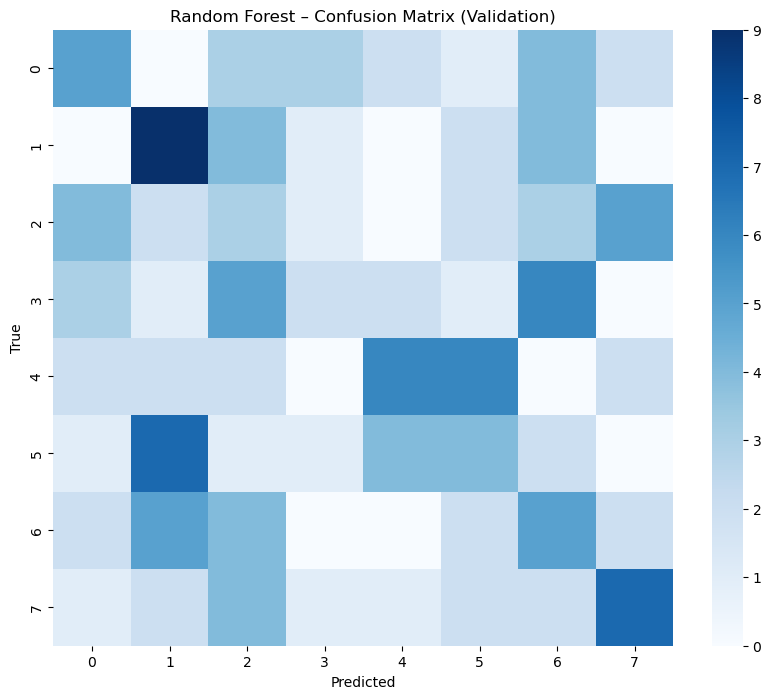

In [47]:
cm = confusion_matrix(y_val_rf, val_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Random Forest – Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### 5.2 Classification Report

This gives:

* Per-class Precision
* Per-class Recall
* Per-class F1
* Macro F1
* Weighted F1

In [48]:
print(classification_report(y_val_rf, val_pred))

               precision    recall  f1-score   support

      Feeling       0.28      0.25      0.26        20
       Friend       0.32      0.45      0.38        20
        Happy       0.12      0.15      0.13        20
      Married       0.22      0.10      0.14        20
  Necessities       0.40      0.30      0.34        20
      NewYork       0.20      0.20      0.20        20
   RememberMe       0.19      0.25      0.22        20
TryEverything       0.39      0.35      0.37        20

     accuracy                           0.26       160
    macro avg       0.26      0.26      0.25       160
 weighted avg       0.26      0.26      0.25       160



#### 5.3 Top-k Accuracy (k = 3 and k = 5)

In [49]:
probs_val = rf_model.predict_proba(X_val_rf)
classes = rf_model.classes_

def top_k_accuracy(y_true, probs, labels, k):
    correct = 0
    for i in range(len(y_true)):
        top_k_idx = np.argsort(probs[i])[::-1][:k]
        top_k_labels = labels[top_k_idx]
        if y_true[i] in top_k_labels:
            correct += 1
    return correct / len(y_true)

top3 = top_k_accuracy(y_val_rf, probs_val, classes, k=3)
top5 = top_k_accuracy(y_val_rf, probs_val, classes, k=5)

print("Top-3 Accuracy:", round(top3, 4))
print("Top-5 Accuracy:", round(top5, 4))

Top-3 Accuracy: 0.6
Top-5 Accuracy: 0.7875


### 6. Results Explanation

**Overall Performance**

The Random Forest shows a similar pattern to the Logistic Regression model:

* Validation accuracy is low (0.25)
* Test accuracy on the smaller 400-sample dataset is high (0.6)
* Test accuracy on the larger 800-sample dataset is also high (0.78)

This behaviour indicates that the model struggles during validation on the training domain, but generalises surprisingly well to external datasets.

Combined with the confusion-matrix metrics, this suggests that Random Forest is not learning a deeply discriminative representation during training, but still captures broad MFCC-based acoustic patterns, which transfer well across datasets.


**Reasons Why Validation Accuracy Is Low**

1. MFCC features cause information loss: MFCCs compress the audio heavily, removing pitch contour and fine-grained humming structure.
Random Forests cannot recover the lost harmonic/temporal relationships, leading to weaker in-domain learning.

2. Random Forests struggle with very high-dimensional flattened MFCCs: Flattened MFCC matrices produce feature vectors with thousands of coefficients.
Tree-based models perform poorly when:

* The number of features ≫ number of samples
* Features are continuous and noisy
* Many features are highly correlated (MFCC frames are almost identical over time)

    This leads to unstable splits and lower validation performance.


3. Validation uses augmented-free audios while training uses augmented audio

    This creates:

* A domain gap between the augmented training distribution and the clean validation distribution.
* Random Forests cannot generalise well across distribution shifts, unlike neural networks.


**Secondary Metrics Intepretration**

1. **Precision and recall are inconsistent across classes**

* Friend: reasonable recall (0.45) = The model predicts this class more frequently
* Married: low recall (0.10) = The model fails to recognise this song
* Happy: both precision (0.12) and recall (0.15) are low = difficult class
* NewYork: low precision (0.20) and low recall (0.20) = not very easy to distinct the melody

This inequality suggests:

* Some songs have more distinctive MFCC patterns
* Others might have overlapping frequency envelopes when hummed
* The model tends to confuse songs with similar spectral shapes
* Songs with subtle or smoother humming shape (e.g., Married, Happy) are often missed.


2. **Macro F1 = 0.25**

Macro treats all classes equally. Low macro F1 means:

* Underperformance is not isolated to a couple of songs
* The model struggles globally, not just with rare classes

3. **Weighted F1 = 0.25**

    Since each class has the same number of samples, weighted F1 does not distort the view. Thus, the low F1 truly reflects real class-level difficulties.

The Random Forest model captures broad MFCC patterns well enough to generalise to external datasets but fails to learn robust class-specific representations, leading to low validation performance and uniformly weak precision/recall across classes.

## 6.3.3 Convoluted Neural Networks Model

This model uses **log-mel spectrograms** as 2D inputs to a convolutional neural network.  
Spectrograms preserve time–frequency structure, allowing the CNN to learn local patterns (pitch contours, harmonics) that are important for distinguishing hummed melodies.

We fix the spectrogram shape to **(64 mel bands × 312 time frames)** (one channel) so the network receives uniform inputs.  
Training uses early stopping on validation loss to reduce overfitting and data augmentation is applied only to the training set.


### 1. Data Preparation: Pad/Crop Spectrograms & Prepare Dataset

To train a convolutional neural network, all inputs must share a consistent shape. However, log-mel spectrograms derived from different audio files may vary in time duration due to small differences in recording length or preprocessing. This subsection standardizes all spectrograms by padding or cropping them to a fixed number of time frames, ensuring that each sample has identical dimensions. This step enables efficient batching, GPU processing, and stable model convergence. Additionally, data augmentation is applied during training to improve generalisation.

In [57]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Target spectrogram size
N_MELS = 64
TARGET_FRAMES = 312

def pad_or_crop_spectrogram(spec, target_frames=TARGET_FRAMES):
    n_mels, frames = spec.shape
    if frames == target_frames:
        return spec
    if frames > target_frames:
        return spec[:, :target_frames]
    pad_width = target_frames - frames
    return np.pad(spec, ((0,0),(0,pad_width)), mode='constant', constant_values=(spec.min(),))

def prepare_logmel_dataset(df, apply_aug=False):
    specs = []
    labels = []
    for _, row in df.iterrows():
        filepath = row["filepath"]
        label = row["song"]
        y = preprocess_audio(filepath, apply_aug=apply_aug)
        spec = extract_logmel(y, TARGET_SR, n_mels=N_MELS)
        spec_fixed = pad_or_crop_spectrogram(spec, TARGET_FRAMES)
        specs.append(spec_fixed.astype(np.float32))
        labels.append(label)
    X = np.stack(specs)[..., np.newaxis]  # add channel dim
    y = np.array(labels)
    return X, y

# Prepare datasets
X_train_mel, y_train_mel = prepare_logmel_dataset(df_train, apply_aug = True)
X_val_mel,   y_val_mel   = prepare_logmel_dataset(df_val, apply_aug = False)
X_testA_mel, y_testA_mel = prepare_logmel_dataset(df_400, apply_aug = False)
X_testB_mel, y_testB_mel = prepare_logmel_dataset(df_800, apply_aug = False)

print("Shapes:")
print("X_train_mel:", X_train_mel.shape)
print("X_val_mel:", X_val_mel.shape)
print("X_testA_mel:", X_testA_mel.shape)
print("X_testB_mel:", X_testB_mel.shape)

Shapes:
X_train_mel: (640, 64, 312, 1)
X_val_mel: (160, 64, 312, 1)
X_testA_mel: (400, 64, 312, 1)
X_testB_mel: (800, 64, 312, 1)


### 2. Label Encoding / One-Hot Conversion

Neural networks require labels to be expressed numerically. This subsection converts categorical song identifiers into integer indices using label encoding. Since the CNN is trained with a softmax output layer and categorical cross-entropy loss, labels must also be represented as one-hot vectors. One-hot encoding ensures that the loss function treats each class independently and that the gradient correctly reflects the probability distribution over the eight songs.

In [58]:
le = LabelEncoder()
le.fit(np.concatenate([y_train_mel, y_val_mel, y_testA_mel, y_testB_mel]))

y_train_enc = le.transform(y_train_mel)
y_val_enc   = le.transform(y_val_mel)
y_testA_enc = le.transform(y_testA_mel)
y_testB_enc = le.transform(y_testB_mel)

num_classes = len(le.classes_)
print("Num classes:", num_classes)

# One-hot for Keras
y_train_cat = to_categorical(y_train_enc, num_classes)
y_val_cat   = to_categorical(y_val_enc, num_classes)

Num classes: 8


### 3. CNN Architecture

This subsection describes the convolutional neural network used for melody classification. CNNs are well suited for audio spectrograms because they capture local time–frequency patterns (e.g., pitch transitions, harmonic structures) through convolutional filters. The architecture includes multiple convolutional layers, batch normalization, pooling operations, and dense layers for classification. These components allow the model to learn hierarchical representations of melodic features, progressing from low-level spectral cues to high-level song-specific patterns.

In [59]:
from tensorflow.keras import layers, models, optimizers, callbacks

def build_cnn(input_shape=(N_MELS, TARGET_FRAMES, 1), num_classes=num_classes):
    inp = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, (3,3), padding="same", activation=None)(inp)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D((2,2))(x)

    x = layers.Conv2D(64, (3,3), padding="same", activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D((2,2))(x)

    x = layers.Conv2D(128, (3,3), padding="same", activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D((2,2))(x)

    x = layers.Conv2D(256, (3,3), padding="same", activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D((2,2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs=inp, outputs=out)
    return model

cnn_model = build_cnn()
cnn_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
cnn_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 312, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 312, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 312, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64, 312, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 156, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 156, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 156, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 32, 156, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 78, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 78, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 78, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 16, 78, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 39, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 39, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 39, 256)          │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 8, 39, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 19, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │              

 Total params: 423,688 (1.62 MB)

 Trainable params: 422,728 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

### 4. Training Stage

The training procedure outlines how model parameters are optimized. The CNN is trained using the Adam optimizer, which adapts learning rates based on gradient statistics. Early stopping is applied to prevent overfitting by halting training when validation performance ceases to improve, and learning rate scheduling helps stabilize convergence by reducing the step size once training plateaus. This systematic training strategy ensures efficient optimization and promotes better generalization to unseen humming recordings.

In [60]:
es = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1)
rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

history = cnn_model.fit(
    X_train_mel, y_train_cat,
    validation_data=(X_val_mel, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[es, rlr],
    verbose=2)

Epoch 1/50
20/20 - 16s - 792ms/step - accuracy: 0.1344 - loss: 2.4918 - val_accuracy: 0.1250 - val_loss: 5.8493 - learning_rate: 0.0010
Epoch 2/50
20/20 - 12s - 616ms/step - accuracy: 0.1594 - loss: 2.1565 - val_accuracy: 0.1250 - val_loss: 5.1308 - learning_rate: 0.0010
Epoch 3/50
20/20 - 12s - 619ms/step - accuracy: 0.1531 - loss: 2.1078 - val_accuracy: 0.1187 - val_loss: 2.7079 - learning_rate: 0.0010
Epoch 4/50
20/20 - 12s - 594ms/step - accuracy: 0.1141 - loss: 2.1119 - val_accuracy: 0.1250 - val_loss: 2.3716 - learning_rate: 0.0010
Epoch 5/50
20/20 - 12s - 600ms/step - accuracy: 0.1766 - loss: 2.0616 - val_accuracy: 0.1063 - val_loss: 2.1938 - learning_rate: 0.0010
Epoch 6/50
20/20 - 12s - 596ms/step - accuracy: 0.1500 - loss: 2.0800 - val_accuracy: 0.1688 - val_loss: 2.0690 - learning_rate: 0.0010
Epoch 7/50
20/20 - 12s - 602ms/step - accuracy: 0.1797 - loss: 2.0589 - val_accuracy: 0.1875 - val_loss: 2.0643 - learning_rate: 0.0010
Epoch 8/50
20/20 - 12s - 610ms/step - accuracy: 

### 5. Validation Stage

The validation stage evaluates model performance on a hold-out subset of the training dataset (here, 20% of Dataset B). This stage serves multiple purposes: it allows hyperparameter tuning, monitors overfitting during training, and informs early stopping decisions for the CNN. Using a validation set ensures that performance estimates reflect generalisation to unseen data rather than memorization of training samples.

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Validation
val_probs = cnn_model.predict(X_val_mel, verbose=0)
val_pred_idx = np.argmax(val_probs, axis=1)
val_pred_labels = le.inverse_transform(val_pred_idx)
val_acc = accuracy_score(y_val_mel, val_pred_labels)
print("Validation Accuracy (CNN):", round(val_acc,4))

Validation Accuracy (CNN): 0.3625


### 6. Testing Stage

The testing stage assesses final model generalisation on independent datasets not used during training or validation (Dataset A and Dataset B). This step provides an unbiased measure of how the model performs on novel samples, including potential variations in participant humming styles, recording conditions, or melodic interpretation. Testing on multiple datasets helps evaluate the robustness and scalability of the learned classifiers.

In [62]:
# Test A
testA_probs = cnn_model.predict(X_testA_mel, verbose=0)
testA_pred_idx = np.argmax(testA_probs, axis=1)
testA_pred_labels = le.inverse_transform(testA_pred_idx)
testA_acc = accuracy_score(y_testA_mel, testA_pred_labels)
print("Test A Accuracy (CNN):", round(testA_acc,4))

# Test B
testB_probs = cnn_model.predict(X_testB_mel, verbose=0)
testB_pred_idx = np.argmax(testB_probs, axis=1)
testB_pred_labels = le.inverse_transform(testB_pred_idx)
testB_acc = accuracy_score(y_testB_mel, testB_pred_labels)
print("Test B Accuracy (CNN):", round(testB_acc,4))

Test A Accuracy (CNN): 0.36
Test B Accuracy (CNN): 0.3538


### 7. Secondary Metrics

These metrics reveal which songs are frequently confused, the reliability of predictions for each class, and whether the model correctly ranks the true label among its top guesses. Such analyses are crucial for interpreting limitations, identifying patterns of errors, and guiding future improvements.

#### 7.1 Confusion Matrix

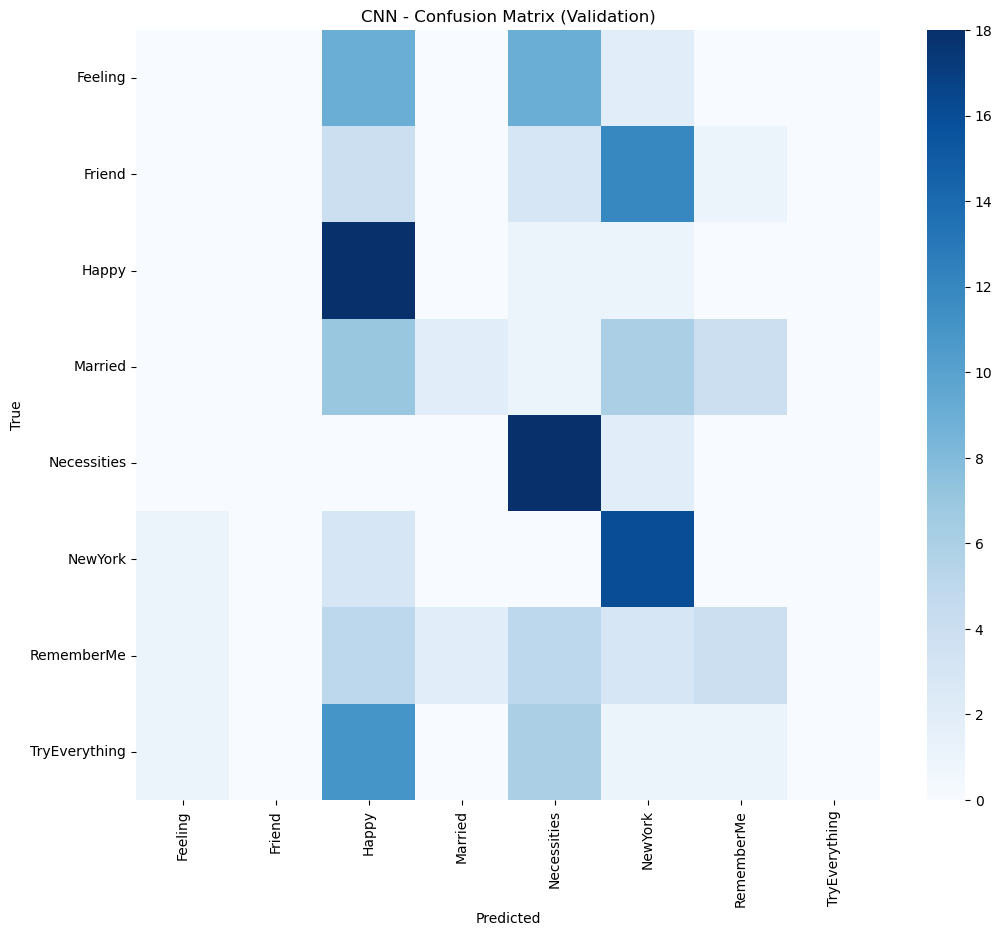

In [64]:
# Confusion Matrix
cm = confusion_matrix(y_val_mel, val_pred_labels, labels=le.classes_)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("CNN - Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### 7.2 Classification Report

In [67]:
# Classification report
print("Classification report (Validation):")
print(classification_report(y_val_mel, val_pred_labels, digits=4))

# Macro F1
macro_f1 = f1_score(y_val_mel, val_pred_labels, average="macro")
print("Macro F1 (Validation):", round(macro_f1,4))

Classification report (Validation):
               precision    recall  f1-score   support

      Feeling     0.0000    0.0000    0.0000        20
       Friend     0.0000    0.0000    0.0000        20
        Happy     0.3158    0.9000    0.4675        20
      Married     0.5000    0.1000    0.1667        20
  Necessities     0.4186    0.9000    0.5714        20
      NewYork     0.3721    0.8000    0.5079        20
   RememberMe     0.4000    0.2000    0.2667        20
TryEverything     0.0000    0.0000    0.0000        20

     accuracy                         0.3625       160
    macro avg     0.2508    0.3625    0.2475       160
 weighted avg     0.2508    0.3625    0.2475       160

Macro F1 (Validation): 0.2475


C:\Users\oscar\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\oscar\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\oscar\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### 7.3 Top-k Accuracy (k = 3 and k = 5)

In [66]:
# Top-k aacuracy
def top_k_accuracy_labels(y_true, probs, labels, k):
    correct = 0
    for i in range(len(y_true)):
        top_k_idx = np.argsort(probs[i])[::-1][:k]
        top_k_labels = labels[top_k_idx]
        if y_true[i] in top_k_labels:
            correct += 1
    return correct / len(y_true)

labels_arr = le.classes_
print("Top-3 Accuracy (Validation):", round(top_k_accuracy_labels(y_val_mel, val_probs, labels_arr, 3),4))
print("Top-5 Accuracy (Validation):", round(top_k_accuracy_labels(y_val_mel, val_probs, labels_arr, 5),4))

Top-3 Accuracy (Validation): 0.6438
Top-5 Accuracy (Validation): 0.8812


### 8. Results Explanation

**Overall Performance**

The CNN achieves a validation accuracy of 36.25% and similar test accuracies on Dataset A (36%) and Dataset B (35.38%). This shows that the CNN slightly outperforms the classical models (Logistic Regression and Random Forest) on this task, though overall performance remains moderate. The model is able to capture some melodic and harmonic patterns, as evidenced by higher top-3 (64.38%) and top-5 (88.12%) accuracies, indicating that even when the top prediction is incorrect, the true song is often among the top candidates.


**Reasons Why Validation Accuracy Is Low**

Several factors likely contribute to the relatively low validation accuracy:

* Small per-class sample size: With only 16 training samples per song, the CNN cannot fully learn generalizable features across participants.
* High variability in humming/whistling: Differences in pitch, tempo, and personal vocal characteristics make classification challenging.
* Underfitting / insufficient representation: The CNN may require more data or stronger augmentation to capture the subtle distinctions between songs.
* Sparse correct predictions for some classes: Classes like Feeling, Friend, and TryEverything show zero recall, indicating the model struggles with certain songs, likely due to lack of training samples or higher melodic similarity with other classes.

**Secondary Metrics Interpretation**

* Per-class performance: Certain songs (Happy, Necessities, NewYork) achieve high recall (0.8–0.9), suggesting the CNN is able to reliably detect a subset of songs with distinctive melodic patterns. Conversely, some songs have zero recall, highlighting imbalance in learnable features across classes.
* Macro F1 (0.2475): Reflects the average per-class performance; low value indicates strong class imbalance and poor generalization to harder-to-learn classes.
* Top-k accuracy: Top-3 and top-5 accuracies (64.38% and 88.12%) reveal that while the CNN struggles to predict the exact top song, it frequently ranks the correct song among the most probable predictions. This aligns with the musical context where many melodies share similar fragments.

# 7 Conclusions

In this study, we explored the automatic classification of hummed and whistled melodies using three different models: Logistic Regression, Random Forest, and a Convolutional Neural Network (CNN). We implemented consistent preprocessing pipelines, including amplitude normalization, resampling, padding/truncation, and data augmentation and extracted features appropriate for each model (MFCCs for classical models and log-Mel spectrograms for CNN).

**Findings**

* Classical models (Logistic Regression and Random Forest) achieved moderate test accuracies (~69–71%) but low validation accuracies (~30%).
* The CNN slightly outperformed classical models in validation accuracy (36.25%), and its top-k accuracies demonstrated that it frequently ranks the correct song among the top predictions, even if the top-1 prediction is incorrect.
* Overall, all models struggled with songs that had limited or highly variable samples, highlighting the challenges of small datasets and participant variability.

**Limitations**

* The dataset is relatively small, which limits the ability of models, especially CNNs, to learn robust representations.
* High variability in human humming and whistling introduces noise that classical feature-based models cannot fully capture.
* Certain songs were consistently misclassified, indicating possible melodic similarity or insufficient distinguishing features in the input representation.

**Suggestions**

* Increase dataset size, either by collecting more recordings or using advanced data augmentation techniques.
* Explore more expressive feature representations, such as pitch contours, chroma features, or learned embeddings.
* Consider more advanced architectures for the CNN to better capture temporal dependencies and melodic patterns.
* Investigate ensemble approaches combining classical models with neural networks for improved robustness.
* Evaluate additional metrics such as top-k accuracy, per-class F1, and confusion patterns to better understand model weaknesses and guide targeted improvements.


This work demonstrates the feasibility of automated melody classification from hummed or whistled inputs but also highlights the challenges inherent in small, variable datasets. Future work should focus on expanding the dataset, improving feature representations, and leveraging modern deep learning techniques to enhance model generalization.


# 8 References

* MLEnd Hums and Whistles II Dataset (2025).  
  Provided as part of the ECS7020P Mini-Project.
  https://github.com/thekmannn/MLEndHW_Sample/raw/main/MLEndHWII_Sample_800.zip

* Bishop, C. (2006). *Pattern Recognition and Machine Learning.*  
  Springer.  
  (Referenced for classical ML models such as k-NN, SVM, and Random Forest.)

* TensorFlow and Keras documentation.  
  TensorFlow Developers (2023). https://www.tensorflow.org/api_docs

* Librosa: Python library for audio analysis.  
  McFee et al. (2015). *librosa: Audio and Music Signal Analysis in Python.* https://librosa.org

* Pedregosa et al. (2011). *Scikit-learn: Machine Learning in Python.*  
  Journal of Machine Learning Research. https://scikit-learn.org

* Goodfellow, Bengio & Courville (2016). *Deep Learning.* MIT Press.
